# Investigating Fandango Movie Ratings

## Introduction

In October 2015, a data journalist named Walt Hickey analysed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest (Fandango is an online movie ratings aggregator). He published his analysis in this article https://fivethirtyeight.com/features/fandango-movies-ratings/
Hickey found that there's a significant discrepancy between the number of stars displayed to users and the actual rating, which he was able to find in the HTML of the page. 

Fandango's officials replied that the biased rounding off was caused by a bug in their system rather than being intentional, and they promised to fix the bug as soon as possible. Presumably, this has already happened, although we can't tell for sure since the actual rating value doesn't seem to be displayed anymore in the pages' HTML.

In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis


## Analysis

The way to identify whether there has been a change in rating system is to compare the system’s characteristics before and after the article. Fortunately, we have access to both data sets. The data before the analysis was made available by Walt Hickey himself on GitHub https://github.com/fivethirtyeight/data/tree/master/fandango

One of the Dataquest’s team members collected movie ratings data for movies released in 2016 and 2017. It is available on GitHub as well https://github.com/mircealex/Movie_ratings_2016_17 We will use it to analyse the data after Hickey’s analysis. 

In [1]:
import pandas as pd #Importing data set
previous = pd.read_csv('fandango_score_comparison.csv')
after = pd.read_csv('movie_ratings_16_17.csv')
previous.head(3) #analysing the data

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5


In [2]:
after.head(3) #analysing the other data set

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.5,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.5,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.0,2.35,2.5,3.5,2.0,2.5


In [3]:
# Isolating the columns that offer only information we are interested in.
previous = previous[
    ['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]

after = after[['movie', 'year', 'fandango']]

In [4]:
previous.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


In [5]:
after.head(3)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


Our goal is to establish whether there has been any change in Fandango's rating system after Hickey's analysis. The data we have was sampled at the moments we want: before and after the analysis. 

We need to describe the population, therefor we need to make sure the samples are representative, otherwise large sampling errors would be expected.  
One of the Hickey’s criteria was the fact that the  movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015). It is questionable whether this sample is representative of the entire population . 

The sampling criteria for the other rating was to contain  movies with a considerable number of votes and reviews, however unclear how many. 
Both samples are subjects to temporal trends and do not represent our population entirely. 

As a result we should amend our goal slightly and instead of establishing the change in rating system we should try to find out if there is any difference between Fandango’s ratings for popular movies in 2015 and 2016. 

## Amending the goal of our analysis

To achieve new goal we should work with two populations: Fandango ratings for popular movies in 2015 and 2016.  

As the term ‘popular’ is vague we should establish exact benchmark for the movie to be included in the analysis. Using Hickey’s parameter of minimum 30 ratings should be acceptable for the purpose of our analysis.

The second data set does not contain exact number of fan ratings. It would be logical to check the representativity of the sample by randomly selecting 10 movies and checking their ratings on Fandango website. If at least 8 out of 10 movies have at least 30 ratings the sample would count as representative. 

In [6]:
after.sample(10, random_state = 1) 
#random_state = 1 to show we are not trying to get favourable result

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Upon checking Fandango website we discover that the movie's rating is now powered by Rotten Tomatoes. Whether this change was made due to the Hickey’s article remains unknown.  At this stage we cannot achieve adequate representativity between two data sets and can potentially terminate our analysis. However, for the learning purpose we shall continue and assume that at least 80% of popular movies have minimum 30 fan ratings. 

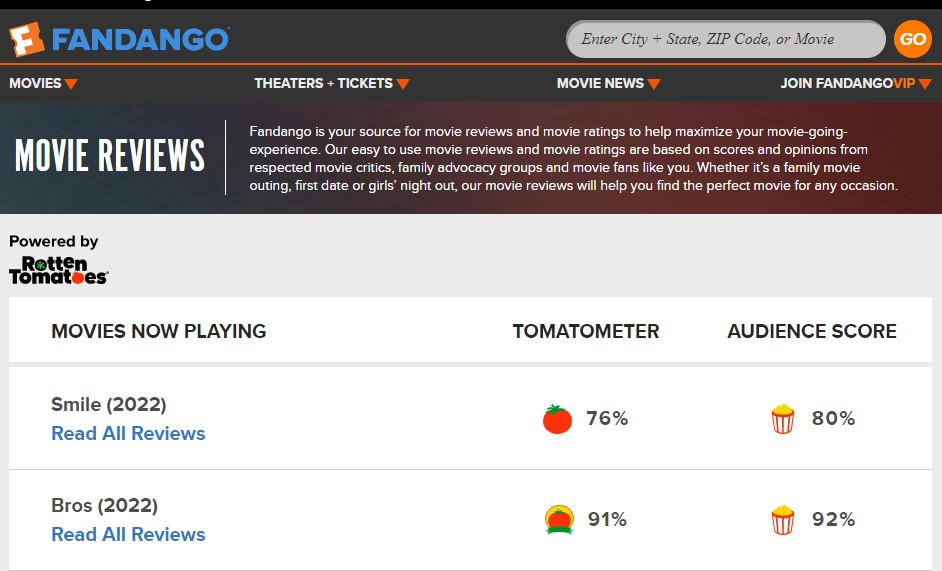

In [7]:
sum(previous['Fandango_votes']<30) 
# checking the other data set to see if term "popular" meets the preset requirements 

0

We need to isolate only the sample points that belong to our populations of interest, 
i.e. the movies released in 2015 in one data set and released in 2016 in another separate data set.

In [8]:
previous['Year'] = previous['FILM'].str[-5:-1]
previous.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [9]:
previous['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [10]:
previous_2015 = previous[previous['Year'] == '2015'].copy()

In [11]:
previous_2015['Year'].value_counts() #checking the results

2015    129
Name: Year, dtype: int64

In [12]:
after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


In [13]:
after_2016 = after[after['year'] == 2016].copy()

In [14]:
after_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

## Comparing Distribution Shapes
We will start by comparing the shapes of the two distributions using kernel density plots. 

First we will use Fandango's Stars rating as a comparable value for 2015 data set

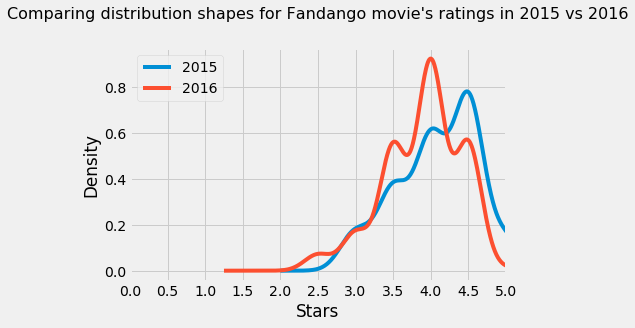

In [15]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from numpy import arange

plt.style.use('fivethirtyeight') #applying this popular template
previous_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True)
after_2016['fandango'].plot.kde(label = '2016', legend = True)
plt.title("Comparing distribution shapes for Fandango movie's ratings in 2015 vs 2016", 
          y = 1.1, fontsize = 16)
plt.xlabel('Stars')
plt.xlim(0,5)
plt.xticks(arange(0,5.5,0.5))
plt.show()


The shape of the above kernel density plot visually resembles the shape of the plot from Hickey’s article (please see below). It may suggest we are on the right path.

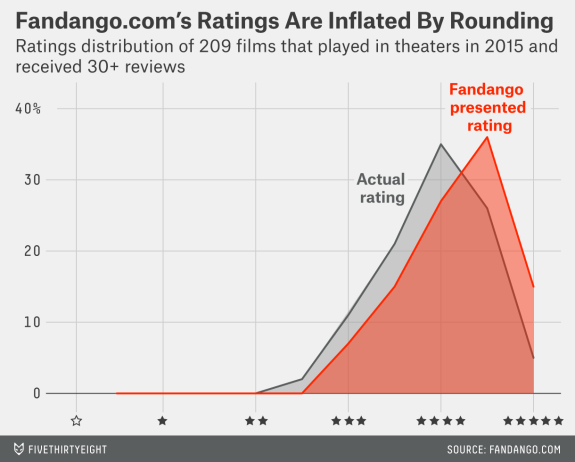

Now we will use Ratingvalue as comparable value for 2015 data set

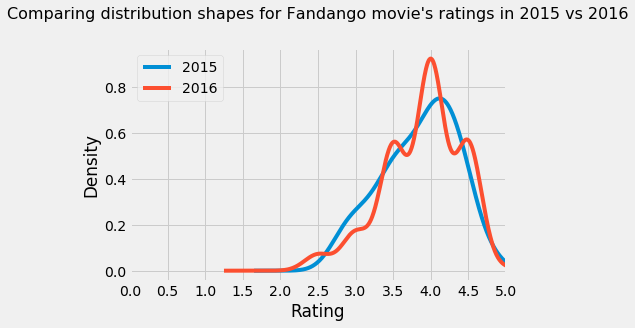

In [16]:
plt.style.use('fivethirtyeight') #applying this popular template
previous_2015['Fandango_Ratingvalue'].plot.kde(label = '2015', legend = True)
after_2016['fandango'].plot.kde(label = '2016', legend = True)
plt.title("Comparing distribution shapes for Fandango movie's ratings in 2015 vs 2016", 
          y = 1.1, fontsize = 16)
plt.xlabel('Rating')
plt.xlim(0,5)
plt.xticks(arange(0,5.5,0.5))
plt.show()


As we can see both distributions are heavily left (negatively) skewed which means most of the movie’s ratings are positive. The fact that Fandango also sells tickets makes us question their objectivity. In addition, while using ‘Stars’ as a comparative value for 2015 data set, we can clearly see the difference in rating with 2016 values being more skewed to the left suggesting the rating has been less positive. Whether this is due to the changes in algorithm applied after the article is unknown. 

While comparing the distributions with the help of the kernel density plots was a great start, we now need to analyze more granular information.

Let's examine the frequency distribution tables of the two distributions. As data sets have different amount of movies we should normalize and use percentage instead.

In [17]:
print(2015)
previous_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

2015


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [18]:
print(2016)
after_2016['fandango'].value_counts(normalize = True).sort_index()*100

2016


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

There is a quite clear difference between the two distributions. However, the direction of the difference is not as clear as it was on the kernel density plots. The percentage of 4.5 & 5.0 stars reviews from 2016 data set is clearly less. There are more 3.5 & 4.0 reviews in 2016 set. 

Let’s take the two summaries statistics to get a more precise picture about the direction of the difference. We will calculate mean, median and mode for each data set and visualise it using bar plot. 

In [19]:
mean_2015 = previous_2015['Fandango_Stars'].mean()
median_2015 = previous_2015['Fandango_Stars'].median()
mode_2015 = previous_2015['Fandango_Stars'].mode()[0]

mean_2016 = after_2016['fandango'].mean()
median_2016 = after_2016['fandango'].median()
mode_2016 = after_2016['fandango'].mode()[0]

In [20]:
summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


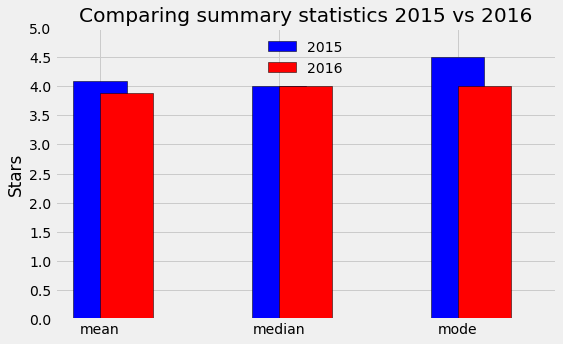

In [21]:
summary['2015'].plot.bar(color = 'Blue',edgecolor = 'Black', 
                         align = 'center', width = .3, figsize = (8,5))
summary['2016'].plot.bar(color = 'Red', edgecolor = 'Black', 
                         align = 'edge', width = .3, rot = 0)
plt.legend(loc = 'upper center', framealpha = 0)
plt.ylabel('Stars')
plt.ylim(0,5)
plt.yticks(arange(0,5.5,0.5))
plt.title('Comparing summary statistics 2015 vs 2016')
plt.show()

In [22]:
(mean_2015 - mean_2016)/mean_2015 * 100 
#calculating the difference in percentages

4.842683568951993

As a result, we can see that the average rating for 2016 movies is less than 2015 by approximately 5%. The 2016 mode is also less  by 0.5

## Conclusion

Finally, after amending our initial goal we established that there is indeed difference between the ratings of popular movies in 2015 and 2016. The rating for 2016 movies is less than 2015 movies. 

Whether this change had been driven by Walt Hickey’s articles is unknown, but we can speculate it may have had an impact on the new algorithm used for the rating calculations.  Eventually, the rating system on Fandango website had been replaced by Rotten Tomatoes rating, which adds impact to our speculations. 